<a href="https://colab.research.google.com/github/esperonj/Equipo26/blob/main/Avance3_Equipo26_YOLOV8_100E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

# Librerías
import os
import random
import shutil

# Definir carpetas base
carpeta_base = '/content/drive/MyDrive'
carpeta_imagenes = os.path.join(carpeta_base, 'Labels')
carpeta_etiquetas = os.path.join(carpeta_base, 'train')

# Crear estructura de dataset para YOLO
yolo_path = '/content/yolo_dataset'
for split in ['train', 'val']:
    os.makedirs(os.path.join(yolo_path, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(yolo_path, 'labels', split), exist_ok=True)

# Listar imágenes y etiquetas
imagenes = sorted([f for f in os.listdir(carpeta_imagenes) if f.lower().endswith(('.jpg', '.png','.JPG'))])
etiquetas = sorted([f for f in os.listdir(carpeta_etiquetas) if f.endswith('.txt')])

# Emparejar imágenes con sus etiquetas
pares = [(img, img.rsplit('.', 1)[0] + '.txt') for img in imagenes if img.rsplit('.', 1)[0] + '.txt' in etiquetas]
random.shuffle(pares)

# Dividir en 80% train y 20% val
split_idx = int(0.8 * len(pares))
train_pares = pares[:split_idx]
val_pares = pares[split_idx:]

# Función para copiar archivos
def copiar_pares(pares, tipo):
    for img_file, label_file in pares:
        shutil.copy(os.path.join(carpeta_imagenes, img_file), os.path.join(yolo_path, 'images', tipo, img_file))
        shutil.copy(os.path.join(carpeta_etiquetas, label_file), os.path.join(yolo_path, 'labels', tipo, label_file))

copiar_pares(train_pares, 'train')
copiar_pares(val_pares, 'val')

# Crear archivo de configuración YAML
yaml_content = f"""
path: {yolo_path}
train: images/train
val: images/val
nc: 1
names: ['etiqueta']
"""

with open('/content/yolo_dataset/dataset.yaml', 'w') as f:
    f.write(yaml_content)

Mounted at /content/drive


In [2]:
!pip install ultralytics
from ultralytics import YOLO

# Entrenar modelo base nano
model = YOLO('yolov8n.pt')  # También puedes probar yolov8s.pt, yolov8m.pt, etc.
model.train(data='/content/yolo_dataset/dataset.yaml', epochs=100, imgsz=640)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

100%|██████████| 6.25M/6.25M [00:00<00:00, 371MB/s]

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=F

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 302MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 196.1±13.1 MB/s, size: 2077.2 KB)


train: Scanning /content/yolo_dataset/labels/train... 236 images, 30 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<00:00, 384.32it/s]

train: New cache created: /content/yolo_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 112.3±51.8 MB/s, size: 1662.4 KB)


val: Scanning /content/yolo_dataset/labels/val... 60 images, 5 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 423.43it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.05G      1.131      2.486      1.322         48        640: 100%|██████████| 15/15 [00:28<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]

                   all         60         92      0.895       0.63      0.876      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.52G     0.7498      1.259      1.024         47        640: 100%|██████████| 15/15 [00:15<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         60         92      0.895      0.372      0.826      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.54G     0.7331       1.05      1.017         43        640: 100%|██████████| 15/15 [00:22<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         60         92      0.909      0.869      0.916      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.56G      0.779      1.063      1.031         37        640: 100%|██████████| 15/15 [00:19<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         60         92      0.893      0.804      0.873      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.57G     0.7486      1.027      1.021         45        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         60         92      0.786      0.837       0.83      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.59G     0.7592     0.9746      1.043         43        640: 100%|██████████| 15/15 [00:18<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60         92      0.799      0.736      0.819      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.61G     0.8014     0.9362      1.031         27        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         60         92      0.841      0.772      0.813      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.62G     0.7579     0.8904      1.011         27        640: 100%|██████████| 15/15 [00:20<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         60         92      0.879      0.783      0.869       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.64G     0.7461     0.8305     0.9934         50        640: 100%|██████████| 15/15 [00:16<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         60         92      0.557      0.655      0.608      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.66G     0.7097     0.7713      0.986         34        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         60         92      0.866      0.846       0.88      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.68G     0.7095     0.7834     0.9921         33        640: 100%|██████████| 15/15 [00:20<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         60         92      0.791       0.88      0.881      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.69G     0.6994     0.7125     0.9779         37        640: 100%|██████████| 15/15 [00:20<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         60         92      0.777      0.913      0.873      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.71G     0.6712     0.7119     0.9916         32        640: 100%|██████████| 15/15 [00:20<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         60         92      0.824      0.924        0.9      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.73G     0.6933     0.6962     0.9797         37        640: 100%|██████████| 15/15 [00:20<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         60         92      0.756      0.935      0.814      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.75G     0.7017      0.667     0.9752         42        640: 100%|██████████| 15/15 [00:20<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         60         92      0.812      0.844      0.881      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.76G     0.6786     0.6514     0.9724         41        640: 100%|██████████| 15/15 [00:21<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         60         92      0.912      0.772      0.874      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.78G      0.643     0.6456     0.9613         37        640: 100%|██████████| 15/15 [00:21<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         60         92      0.887      0.891      0.912      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.8G     0.6215     0.5907     0.9488         44        640: 100%|██████████| 15/15 [00:18<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         60         92      0.883      0.902      0.931      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.81G     0.6591     0.5991     0.9643         47        640: 100%|██████████| 15/15 [00:20<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         60         92      0.903       0.91      0.937      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.83G     0.6867     0.5978     0.9743         46        640: 100%|██████████| 15/15 [00:18<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         60         92      0.875       0.88      0.924      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.85G     0.6615     0.5869     0.9681         33        640: 100%|██████████| 15/15 [00:20<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60         92      0.915      0.902       0.93      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.87G     0.6143     0.5872     0.9309         50        640: 100%|██████████| 15/15 [00:19<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         60         92      0.899       0.88       0.92      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.88G     0.6442     0.5672     0.9635         40        640: 100%|██████████| 15/15 [00:18<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         60         92      0.908      0.902       0.94      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.9G     0.6269     0.5589     0.9687         37        640: 100%|██████████| 15/15 [00:20<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         60         92      0.924       0.88      0.959      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.92G     0.6321     0.5318     0.9635         36        640: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60         92      0.932        0.9      0.944      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.93G      0.627     0.5559     0.9598         42        640: 100%|██████████| 15/15 [00:20<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         60         92      0.835       0.87       0.85       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.95G     0.6045     0.5406     0.9519         28        640: 100%|██████████| 15/15 [00:21<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         60         92      0.885      0.913      0.903      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.97G      0.625     0.5188     0.9497         53        640: 100%|██████████| 15/15 [00:18<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         60         92      0.893       0.88      0.934      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.98G     0.5959     0.5277     0.9365         41        640: 100%|██████████| 15/15 [00:17<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         60         92      0.894      0.891      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         3G     0.6098     0.5172     0.9523         44        640: 100%|██████████| 15/15 [00:22<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         60         92      0.915       0.88      0.935      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.02G     0.6138     0.5244     0.9421         45        640: 100%|██████████| 15/15 [00:20<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         60         92      0.891       0.89      0.914      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.04G     0.5967     0.5118     0.9324         35        640: 100%|██████████| 15/15 [00:20<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         60         92      0.904      0.919      0.966      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.05G     0.5743     0.5151     0.9301         32        640: 100%|██████████| 15/15 [00:20<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         60         92      0.934      0.924       0.97      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.07G     0.6114     0.5063       0.96         53        640: 100%|██████████| 15/15 [00:21<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         60         92      0.892      0.897      0.954      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.09G      0.626     0.4951     0.9486         45        640: 100%|██████████| 15/15 [00:18<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         60         92      0.852      0.913      0.948      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       3.1G     0.5729     0.4753     0.9316         44        640: 100%|██████████| 15/15 [00:19<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         60         92       0.85      0.921       0.93      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.12G     0.5725     0.4607     0.9413         21        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         60         92      0.901      0.924      0.895      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.14G     0.5354     0.4428     0.9162         29        640: 100%|██████████| 15/15 [00:18<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         60         92      0.892      0.924      0.929       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.15G     0.5218     0.4426     0.9212         47        640: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         60         92      0.883      0.935      0.944       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.17G      0.547     0.4299     0.9342         50        640: 100%|██████████| 15/15 [00:18<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         60         92      0.922      0.904      0.928      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.19G     0.5491     0.4468     0.9195         36        640: 100%|██████████| 15/15 [00:18<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         60         92      0.851      0.928      0.931      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.21G     0.5542     0.4325     0.9241         23        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         60         92      0.877      0.913       0.94      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.22G      0.544     0.4288     0.9051         40        640: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         60         92      0.941      0.869      0.926      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.24G     0.5432     0.4355     0.9261         32        640: 100%|██████████| 15/15 [00:20<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         60         92      0.927      0.902      0.945      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.26G     0.5629     0.4476      0.925         44        640: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         60         92      0.922      0.902      0.941      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.27G     0.5316     0.4145     0.9278         33        640: 100%|██████████| 15/15 [00:22<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         60         92      0.886      0.913      0.934      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.29G       0.54     0.4161     0.9067         60        640: 100%|██████████| 15/15 [00:20<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         60         92      0.904      0.926      0.934      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.31G     0.5284     0.4159     0.9199         37        640: 100%|██████████| 15/15 [00:22<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         60         92      0.898      0.935      0.947      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.33G     0.5276      0.416     0.9007         47        640: 100%|██████████| 15/15 [00:17<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         60         92       0.87      0.935      0.923      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.34G     0.4916     0.3868     0.8962         27        640: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60         92      0.918      0.924      0.948       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.36G     0.5183     0.3917     0.9167         41        640: 100%|██████████| 15/15 [00:19<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60         92      0.913      0.915      0.941      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.38G     0.5277     0.4003     0.9178         42        640: 100%|██████████| 15/15 [00:18<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         60         92      0.866      0.911      0.934      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.39G     0.5113     0.3978     0.9181         34        640: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         60         92      0.885      0.891      0.931      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.41G     0.5055     0.3844     0.9042         39        640: 100%|██████████| 15/15 [00:22<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         60         92      0.868      0.902      0.946      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.43G     0.5128     0.3998     0.9216         36        640: 100%|██████████| 15/15 [00:19<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         60         92       0.93      0.913      0.939      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.45G     0.4976     0.3841     0.9022         41        640: 100%|██████████| 15/15 [00:18<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         60         92      0.853      0.944      0.933      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.46G     0.4936     0.3815     0.9038         46        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         60         92      0.887      0.946      0.937      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.48G     0.5181     0.3877     0.9127         35        640: 100%|██████████| 15/15 [00:17<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         60         92      0.865      0.946      0.935      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       3.5G     0.5249     0.3882     0.9252         38        640: 100%|██████████| 15/15 [00:20<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         60         92      0.883      0.924      0.927      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.51G     0.4987     0.3998     0.9018         46        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         60         92      0.839      0.924      0.911      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.53G     0.4971     0.3835     0.9128         43        640: 100%|██████████| 15/15 [00:17<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         60         92      0.848      0.924      0.904      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.55G       0.49     0.3825     0.9104         34        640: 100%|██████████| 15/15 [00:16<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         60         92      0.816      0.924      0.908      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.56G     0.4942       0.37     0.9066         27        640: 100%|██████████| 15/15 [00:18<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         60         92      0.899      0.874       0.92      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.58G     0.4767     0.3591      0.896         20        640: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         60         92      0.878      0.913      0.939      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.6G     0.5069     0.3858     0.9163         39        640: 100%|██████████| 15/15 [00:18<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         60         92      0.903       0.88      0.933      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.62G     0.4757     0.3718     0.8913         36        640: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         60         92      0.876      0.924      0.953      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.63G     0.4751     0.3644     0.9074         39        640: 100%|██████████| 15/15 [00:18<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         60         92      0.894      0.902      0.948      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.65G     0.4793     0.3516     0.9041         51        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         60         92      0.876       0.92       0.94      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.67G      0.491     0.3627     0.9081         63        640: 100%|██████████| 15/15 [00:20<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         60         92      0.873      0.898      0.928      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.68G     0.4879      0.351     0.9008         30        640: 100%|██████████| 15/15 [00:17<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         60         92      0.895      0.935      0.942      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.7G     0.4654     0.3409     0.9022         42        640: 100%|██████████| 15/15 [00:16<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         60         92      0.914      0.928      0.949      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.72G     0.4485     0.3284     0.9026         36        640: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         60         92      0.909      0.935      0.946      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.74G     0.4677     0.3399      0.889         48        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         60         92      0.916      0.935      0.949      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.75G      0.441     0.3308     0.8848         34        640: 100%|██████████| 15/15 [00:15<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         60         92      0.882      0.935      0.938      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.77G     0.4514     0.3376     0.8825         37        640: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         60         92      0.904      0.913      0.941      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.79G     0.4663     0.3296     0.8837         36        640: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         60         92      0.903      0.935      0.943      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       3.8G      0.449     0.3263     0.8828         29        640: 100%|██████████| 15/15 [00:17<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         60         92      0.902      0.924      0.936       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.82G     0.4453     0.3246     0.8804         48        640: 100%|██████████| 15/15 [00:17<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         60         92      0.903      0.902      0.919      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.84G     0.4323     0.3266     0.8812         48        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         60         92      0.901      0.902      0.919      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.85G     0.4453     0.3266     0.8918         33        640: 100%|██████████| 15/15 [00:21<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         60         92      0.886      0.935      0.939      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.87G      0.433     0.3315     0.8954         43        640: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         60         92      0.887      0.943      0.942       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.89G     0.4274     0.3378     0.8834         43        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         60         92      0.914      0.924      0.949      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.91G     0.4468     0.3248     0.8887         46        640: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         60         92      0.903      0.912      0.939      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.92G     0.4601     0.3112     0.8962         39        640: 100%|██████████| 15/15 [00:18<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         60         92      0.883      0.924      0.932      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.94G     0.4363     0.3113     0.8938         38        640: 100%|██████████| 15/15 [00:20<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         60         92       0.91      0.913      0.934      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.96G     0.4466     0.3087     0.8883         26        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         60         92      0.901      0.935      0.942      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.97G     0.4196     0.3018     0.8812         43        640: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         60         92      0.901      0.935      0.947      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.99G     0.4129     0.2955     0.8735         42        640: 100%|██████████| 15/15 [00:18<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         60         92      0.895      0.927      0.952      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.01G     0.4424     0.3117     0.8933         55        640: 100%|██████████| 15/15 [00:19<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         60         92      0.885      0.935      0.946      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.03G       0.43     0.3128     0.8801         39        640: 100%|██████████| 15/15 [00:18<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         60         92      0.889      0.935      0.925      0.844


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.04G     0.3791     0.3049     0.8397         20        640: 100%|██████████| 15/15 [00:28<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         60         92      0.898      0.935      0.924      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.06G     0.3707     0.2676     0.8394         16        640: 100%|██████████| 15/15 [00:18<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         60         92      0.903      0.924      0.934       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.08G     0.3541     0.2558     0.8324         17        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         60         92      0.902      0.924      0.939      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       4.1G     0.3531     0.2581     0.8511          7        640: 100%|██████████| 15/15 [00:21<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         60         92      0.903      0.935      0.947      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.11G      0.354     0.2458     0.8333         15        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         60         92      0.902      0.935      0.955      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.13G     0.3526     0.2406     0.8307         12        640: 100%|██████████| 15/15 [00:16<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         60         92      0.903      0.935      0.957      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.15G     0.3447      0.237     0.8497         14        640: 100%|██████████| 15/15 [00:18<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         60         92      0.888      0.943      0.957      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.16G     0.3506     0.2341     0.8373         24        640: 100%|██████████| 15/15 [00:18<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         60         92      0.903      0.924      0.952      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.18G      0.343     0.2354     0.8335         15        640: 100%|██████████| 15/15 [00:17<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         60         92      0.905      0.913      0.944      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       4.2G     0.3348     0.2289     0.8412         16        640: 100%|██████████| 15/15 [00:18<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         60         92      0.894      0.924      0.943      0.853



100 epochs completed in 0.591 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]


                   all         60         92      0.888      0.944      0.957      0.878
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac7c82e3cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [3]:
metrics = model.val()

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2304.8±2011.7 MB/s, size: 2004.1 KB)


val: Scanning /content/yolo_dataset/labels/val.cache... 60 images, 5 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]


                   all         60         92      0.887      0.943      0.956      0.876
Speed: 5.2ms preprocess, 11.7ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train2


In [4]:
# Ruta donde quieres guardar tus resultados
ruta_resultados = '/content/drive/MyDrive/YOLOv8_resultados100E'

# Crear carpeta si no existe
os.makedirs(ruta_resultados, exist_ok=True)

# Copiar pesos entrenados
shutil.copytree('runs/detect/train', os.path.join(ruta_resultados, 'train2'), dirs_exist_ok=True)

# Copiar predicciones (opcional)
shutil.copytree('runs/detect/train2', os.path.join(ruta_resultados, 'predict'), dirs_exist_ok=True)

'/content/drive/MyDrive/YOLOv8_resultados100E/predict'

In [5]:
# Ruta donde quieres guardar tus resultados
ruta_resultados = '/content/drive/MyDrive/YOLOv8_resultados100E'

# Crear carpeta si no existe
os.makedirs(ruta_resultados, exist_ok=True)

In [6]:
import shutil

# Copiar pesos entrenados
shutil.copytree('runs/detect/train2', os.path.join(ruta_resultados, 'train2'), dirs_exist_ok=True)

# Copiar predicciones (opcional)
shutil.copytree('runs/detect/train', os.path.join(ruta_resultados, 'train'), dirs_exist_ok=True)

'/content/drive/MyDrive/YOLOv8_resultados100E/train'

In [7]:
# Cargar modelo entrenado
model = YOLO('runs/detect/train/weights/best.pt')

# Ruta a tus nuevas imágenes
carpeta_nuevas = '/content/drive/MyDrive/nuevas_imagenes'

# Ejecutar predicciones
results = model.predict(source=carpeta_nuevas, save=True, conf=0.25)

# Las imágenes anotadas se guardan automáticamente en:
# runs/detect/predict


image 1/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6183.JPG: 640x480 7 etiquetas, 46.7ms
image 2/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6184.JPG: 640x480 1 etiqueta, 7.5ms
image 3/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6185.JPG: 640x480 2 etiquetas, 8.9ms
image 4/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6186.JPG: 640x480 7 etiquetas, 8.7ms
image 5/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6187.JPG: 640x480 2 etiquetas, 8.6ms
image 6/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6188.JPG: 640x480 2 etiquetas, 9.4ms
image 7/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6189.JPG: 640x480 7 etiquetas, 16.9ms
image 8/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6190.JPG: 640x480 1 etiqueta, 7.3ms
image 9/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6191.JPG: 640x480 4 etiquetas, 7.4ms
image 10/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6192.JPG: 640x480 2 etiquetas, 7.7ms
image 11/96 /content/drive/MyDrive/nuevas_imagenes/IMG_6193.JPG: 640x480 1 etiqueta, 7.1

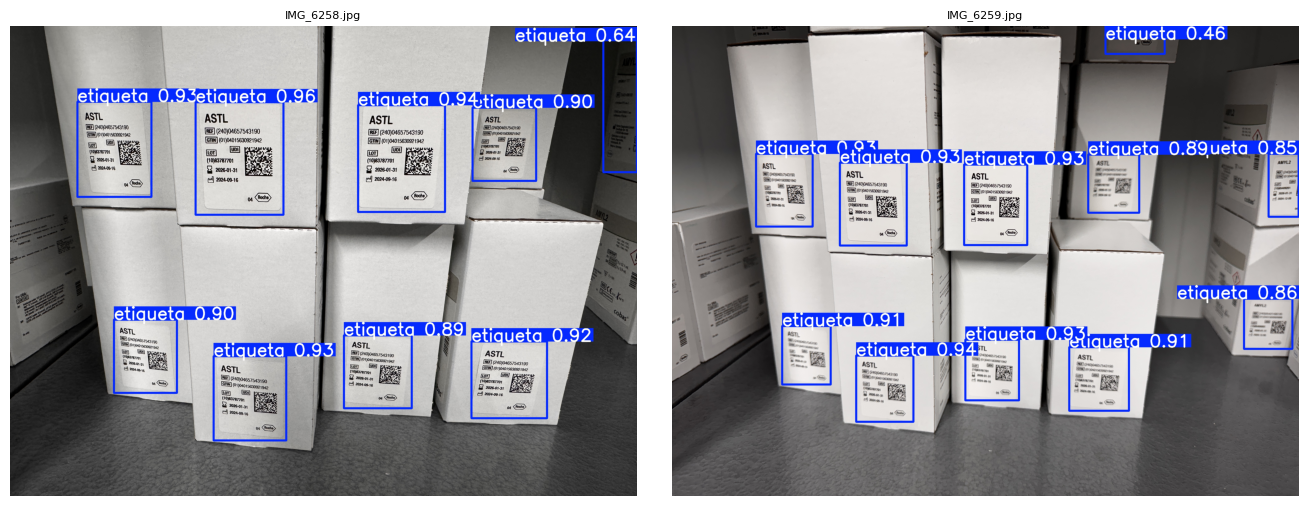

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Ruta donde se guardaron las imágenes predichas
carpeta_resultados = 'runs/detect/predict'
imagenes = sorted([f for f in os.listdir(carpeta_resultados) if f.endswith(('.jpg', '.png'))])[75:77]  # Solo 10 primeras

# Parámetros de visualización
imagenes_por_fila = 3
total_imagenes = len(imagenes)
filas = (total_imagenes + imagenes_por_fila - 1) // imagenes_por_fila

plt.figure(figsize=(20, 5 * filas))

for i, nombre in enumerate(imagenes):
    ruta = os.path.join(carpeta_resultados, nombre)
    img = mpimg.imread(ruta)
    plt.subplot(filas, imagenes_por_fila, i + 1)
    plt.imshow(img)
    plt.title(nombre, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()